In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [5]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

(<matplotlib.figure.Figure at 0x102a4fbe0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f847a58>)

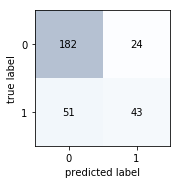

In [14]:
target = "default"
y = np.where(df[target] == 2, 1, 0) #outcome variable
X = df.copy() #feature matrix
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1234)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)


y_test_prob = pipe.predict_proba(X_test)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

#print("training r2:", metrics.r2_score(y_train, y_train_pred),
#      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
#      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
#      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))

In [8]:
pd.DataFrame({"actual": y_test, "predicted": y_test_pred})

,actual,predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


In [10]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x10f8274a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f7f9908>)

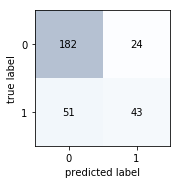

In [11]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [12]:
(182 + 43)/len(X_test)

0.75

In [13]:
metrics.accuracy_score(y_test, y_test_pred)

0.75

In [15]:
y_test_prob

array([[0.95373791, 0.04626209],
       [0.91589834, 0.08410166],
       [0.59878469, 0.40121531],
       [0.69711364, 0.30288636],
       [0.23373701, 0.76626299],
       [0.89313266, 0.10686734],
       [0.93818245, 0.06181755],
       [0.7034394 , 0.2965606 ],
       [0.88794778, 0.11205222],
       [0.75036487, 0.24963513],
       [0.94260864, 0.05739136],
       [0.95186299, 0.04813701],
       [0.67056888, 0.32943112],
       [0.43807439, 0.56192561],
       [0.63421036, 0.36578964],
       [0.78180132, 0.21819868],
       [0.34534385, 0.65465615],
       [0.74134083, 0.25865917],
       [0.61361808, 0.38638192],
       [0.89866627, 0.10133373],
       [0.65563016, 0.34436984],
       [0.90821179, 0.09178821],
       [0.49755615, 0.50244385],
       [0.49675059, 0.50324941],
       [0.43026696, 0.56973304],
       [0.75391469, 0.24608531],
       [0.31725094, 0.68274906],
       [0.91879615, 0.08120385],
       [0.72359676, 0.27640324],
       [0.35735545, 0.64264455],
       [0.

(<matplotlib.figure.Figure at 0x109d97e80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f84c518>)

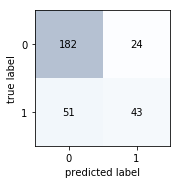

In [20]:
y_test_pred = np.where(y_test_prob[:, 1] > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [19]:
y_test_pred.shape

(1, 2)

In [22]:
recall = 43/(43+51)
recall

0.4574468085106383

In [24]:
precision = 43 / (43+24)
precision

0.6417910447761194

accuracy 0.75 
recall 0.4574468085106383 
precision 0.6417910447761194


(<matplotlib.figure.Figure at 0x10f916940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f8b0e10>)

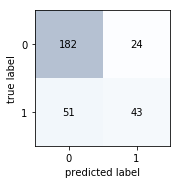

In [31]:
y_test_pred = np.where(y_test_prob[:, 1] > 0.5, 1, 0)
print("accuracy", metrics.accuracy_score(y_test, y_test_pred)
,"\nrecall", metrics.recall_score(y_test, y_test_pred)
,"\nprecision", metrics.precision_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

accuracy 0.71 
recall 0.09574468085106383 
precision 0.8181818181818182


(<matplotlib.figure.Figure at 0x10f9f0fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f9c2550>)

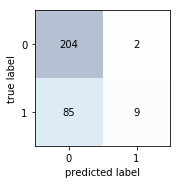

In [32]:
y_test_pred = np.where(y_test_prob[:, 1] > 0.8, 1, 0)
print("accuracy", metrics.accuracy_score(y_test, y_test_pred)
,"\nrecall", metrics.recall_score(y_test, y_test_pred)
,"\nprecision", metrics.precision_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

accuracy 0.6866666666666666 
recall 0.8191489361702128 
precision 0.5


(<matplotlib.figure.Figure at 0x10fa136d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f9d4550>)

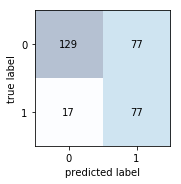

In [33]:
y_test_pred = np.where(y_test_prob[:, 1] > 0.2, 1, 0)
print("accuracy", metrics.accuracy_score(y_test, y_test_pred)
,"\nrecall", metrics.recall_score(y_test, y_test_pred)
,"\nprecision", metrics.precision_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:, 1])

Text(0.5,1,'ROC, auc: 0.7909006403635612')

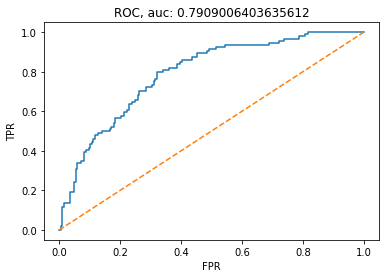

In [41]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: "+ str(metrics.auc(fpr, tpr)))

In [62]:
%%time 

target = "default"
y = np.where(df[target] == 2, 1, 0) #outcome variable
X = df.copy() #feature matrix
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1234)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDClassifier(loss="log",
                                       penalty = "elasticnet",
                                       learning_rate = "invscaling",
                                       eta0 = 0.01, 
                                       max_iter = 2000,
                                       tol = 1e-4
                                      ))
])

param_grid = {
    "est__l1_ratio": np.linspace(0, 1, 10),
    "est__alpha": np.linspace(0.08, 0.09, 10)
}

gsearch = model_selection.GridSearchCV(cv=5, 
                                       estimator=pipe, 
                                       n_jobs=1, 
                                       param_grid=param_grid)
gsearch.fit(X_train, y_train)

est = gsearch.best_estimator_

y_test_prob = est.predict_proba(X_test)
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)
print("test accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("best params: ", gsearch.best_params_)

test accuracy 0.74
best params:  {'est__alpha': 0.08, 'est__l1_ratio': 0.0}
CPU times: user 17.4 s, sys: 27.2 ms, total: 17.4 s
Wall time: 17.4 s


In [55]:
gsearch.best_params_

{'est__alpha': 0.1, 'est__l1_ratio': 0.0}